# Whatlies - Word embedding representations

In [2]:
%%capture
!pip install -Uqq whatlies[all]

In [15]:
import matplotlib.pylab as plt
import whatlies
from whatlies import Embedding

print("whatlies", whatlies.__version__, sep="\t\t")
print("matplotlib.pylab", plt.__version__, sep="\t")

whatlies		0.5.10
matplotlib.pylab	1.19.4


In [16]:
man = Embedding("man", [0.5, 0.1])
woman = Embedding("woman", [0.5, 0.6])
king = Embedding("king", [0.7, 0.33])
queen = Embedding("queen", [0.7, 0.9])

In [17]:
man + woman

Emb[(man + woman)]

In [18]:
man | woman

Emb[(man | woman)]

In [19]:
(man | (queen - king)).vector

array([0.5, 0. ])

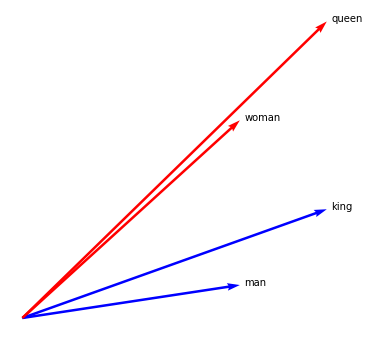

In [24]:
plt.figure(figsize=(6, 6))

man.plot(kind="arrow", color="blue")
woman.plot(kind="arrow", color="red")
king.plot(kind="arrow", color="blue")
queen.plot(kind="arrow", color="red")

plt.axis("off");

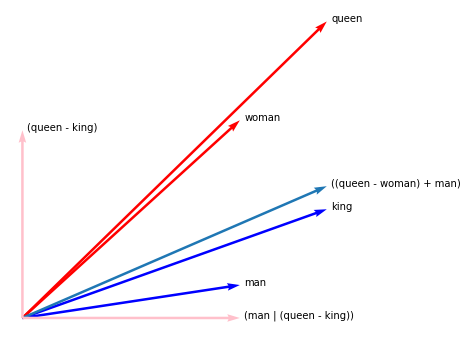

In [27]:
plt.figure(figsize=(6, 6))

man.plot(kind="arrow", color="blue")
woman.plot(kind="arrow", color="red")
king.plot(kind="arrow", color="blue")
queen.plot(kind="arrow", color="red")

((queen - woman) + man).plot(kind="arrow", show_ops=True)
(queen - king).plot(kind="arrow", color="pink", show_ops=True)
(man | (queen - king)).plot(kind="arrow", color="pink", show_ops=True)

plt.axis("off");